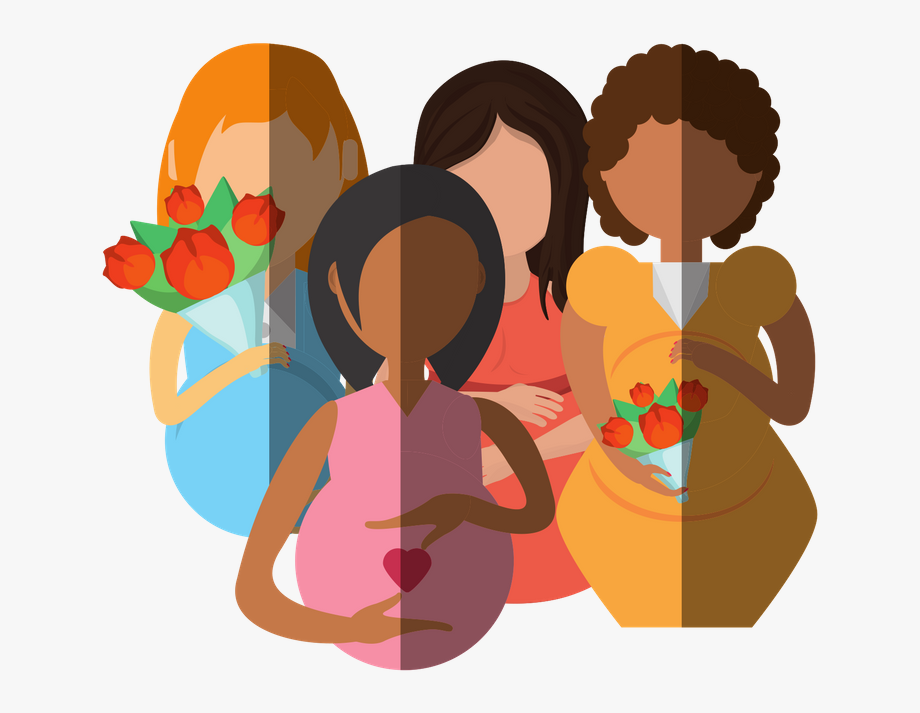

# Imarticus Capstone Project July - 2022
# Title:- Maternal Health Risk Detection
# Author:- Rohith Narayanan S 

## Contents
## I. Project  Abstract;
## II. Problem Statement;
## III. Dataset Information;
## IV.  Solving the Problem:
#### #1. Importing Necessary Libraries
#### #2. Importing the necessary Datasets
#### #3. Exploratory Data Analysis
#### #4. Data Spliting
#### #5. Model Building
#### #6. Conclusion
#### #7. Saving theSelected Model
#### #8. Visualization of the Dataset
## V. Consclusion.

## I. Project Abstract :
Maternal mortality is a major, but often overlooked, public health problem and is unacceptably high now a days. About 2,95,000 women died during and following pregnancy and childbirth in 2017 alone. The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented with proper care.

Sub-Saharan Africa and Southern Asia accounted for approximately 86% (2,54,000) of the estimated global maternal deaths in 2017. Sub-Saharan Africa alone accounted for roughly two-thirds (1,96,000) of maternal deaths, while Southern Asia accounted for nearly one-fifth (58,000). 

At the same time, between 2000 and 2017, Southern Asia achieved the greatest overall reduction in MMR: a decline of nearly 60% (from an MMR of 384 down to 157). Despite its very high MMR in 2017, sub-Saharan Africa as a sub-region also achieved a substantial reduction in MMR of nearly 40% since 2000. Additionally, four other sub-regions roughly halved their MMRs during this period: Central Asia, Eastern Asia, Europe and Northern Africa. Overall, the maternal mortality ratio (MMR) in less-developed countries declined by just under 50%. 

## II. Problem Statement:
Since maternal risk and mortality is such a devastating problem, what can be done to decrease these numbers and to save both the maternal and the fetal health? We will be solving this question of how to predict maternal health outcomes based on CTG data and to prevent the loss of an unborn child.

## III. Dataset Information:
### The dataset consist of Cardiotocography (CTG) measures of baby's heart rate from several pregnant women
### Column Description:
* baseline value - Baseline Fetal Heart Rate (FHR) (beats per minute)  
* accelerations - Number of accelerations per second  
* fetal_movement - Number of fetal movements per second  
* uterine_contractions - Number of uterine contractions per second  
* light_decelerations - Number of light decelerations per second  
* severe_decelerations - Number of severe decelerations per second  
* prolongued_decelerations - Number of prolonged decelerations per second 
* abnormal_short_term_variability - Percentage of time with abnormal short-term variability  
* mean_value_of_short_term_variability - Mean value of short-term variability  
* percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability  
* mean_value_of_long_term_variability - Mean value of long-term variability 
* histogram_width - Width of FHR histogram (generated from exam)  
* histogram_min - Minimum of FHR histogram (generated from exam)  
* histogram_max - Maximum of FHR histogram (generated from exam)  
* histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)  
* histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)  
* histogram_mode - Mode of FHR histogram (generated from exam)  
* histogram_mean - Mean of FHR histogram (generated from exam)  
* histogram_median - Median of FHR histogram (generated from exam)  
* histogram_variance - Variance of FHR histogram (generated from exam)  
* histogram_tendency - Tendency of FHR histogram (generated from exam)  
* fetal_health - Fetal health as assessed by expert obstetrician. 1 - Normal, 2 - Suspect, 3 - Pathological 

## IV. Solving the Problem 

### 1. Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn import metrics
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
%matplotlib inline

### 2. Importing the necessary Datasets:

In [2]:
# Importing training data
df=pd.read_csv('fetal_health.csv')

In [3]:
# Checking dataset
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
# Checking the Shape of Data
df.shape 

(2126, 22)

# The format of dataset is understood

In [5]:
# Creating a new dataset of target Variable alone
df_tar = pd.DataFrame()
df_tar['fetal_health'] = df['fetal_health']
df_tar.sample()

,fetal_health
1663,1.0


In [6]:
# Checking for null values in the target variable
for i in df_tar.columns:
    print(i,'=',df_tar[i].isnull().sum(),df_tar[i].dtype)

fetal_health = 0 float64


## There are no missing in the target variable

### 3. Exploratory Data Analysis:

In [7]:
# Checking whether the index is unique and in order
df.index.is_unique

True

In [8]:
# Checking for false indexes
df.index.duplicated()

array([False, False, False, ..., False, False, False])

In [9]:
# Viewing the sample of the dataframe
df.sample(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1777,121.0,0.003,0.002,0.003,0.005,0.0,0.0,58.0,1.5,0.0,...,67.0,163.0,7.0,1.0,122.0,116.0,120.0,25.0,0.0,1.0
105,125.0,0.004,0.029,0.003,0.004,0.0,0.0,22.0,2.8,0.0,...,56.0,184.0,5.0,1.0,125.0,123.0,126.0,16.0,0.0,1.0
110,125.0,0.007,0.058,0.002,0.007,0.0,0.0,23.0,2.2,0.0,...,78.0,200.0,10.0,0.0,131.0,125.0,128.0,20.0,0.0,1.0
971,131.0,0.000,0.000,0.006,0.009,0.0,0.0,29.0,2.1,4.0,...,59.0,167.0,7.0,1.0,135.0,120.0,132.0,72.0,1.0,1.0
1475,149.0,0.002,0.000,0.009,0.001,0.0,0.0,37.0,1.1,10.0,...,104.0,175.0,6.0,0.0,163.0,159.0,163.0,7.0,1.0,2.0
316,150.0,0.000,0.022,0.000,0.000,0.0,0.0,74.0,0.3,56.0,...,131.0,156.0,4.0,0.0,150.0,150.0,151.0,0.0,1.0,2.0
723,142.0,0.000,0.045,0.000,0.000,0.0,0.0,55.0,0.6,5.0,...,116.0,160.0,4.0,0.0,145.0,145.0,147.0,2.0,1.0,1.0
73,140.0,0.008,0.004,0.004,0.000,0.0,0.0,52.0,1.9,0.0,...,68.0,176.0,2.0,0.0,144.0,147.0,147.0,18.0,1.0,1.0
1251,112.0,0.003,0.000,0.004,0.000,0.0,0.0,24.0,1.3,8.0,...,104.0,144.0,0.0,1.0,114.0,114.0,114.0,3.0,-1.0,1.0
54,148.0,0.000,0.003,0.000,0.000,0.0,0.0,70.0,0.3,69.0,...,136.0,154.0,3.0,0.0,150.0,148.0,150.0,0.0,1.0,3.0


In [10]:
# Dedcribing the properties of the features of the dataset
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [11]:
# Getting the shape of the dataset
df.shape 

(2126, 22)

In [12]:
# Checking for data correlation 
df.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [13]:
# Getting detail on the feature of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

<AxesSubplot:>

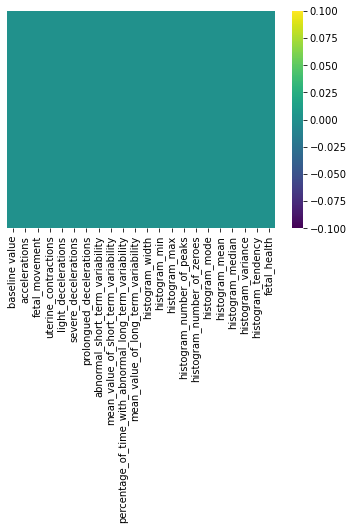

In [14]:
# Checking visually for missing values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [15]:
# Checking for missing values
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

baseline value = 0 float64
accelerations = 0 float64
fetal_movement = 0 float64
uterine_contractions = 0 float64
light_decelerations = 0 float64
severe_decelerations = 0 float64
prolongued_decelerations = 0 float64
abnormal_short_term_variability = 0 float64
mean_value_of_short_term_variability = 0 float64
percentage_of_time_with_abnormal_long_term_variability = 0 float64
mean_value_of_long_term_variability = 0 float64
histogram_width = 0 float64
histogram_min = 0 float64
histogram_max = 0 float64
histogram_number_of_peaks = 0 float64
histogram_number_of_zeroes = 0 float64
histogram_mode = 0 float64
histogram_mean = 0 float64
histogram_median = 0 float64
histogram_variance = 0 float64
histogram_tendency = 0 float64
fetal_health = 0 float64


### There are no Missing values in the Dataframe

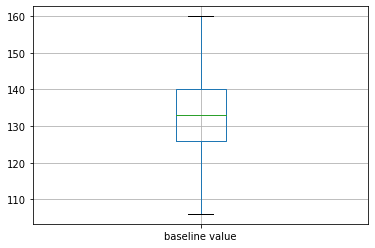

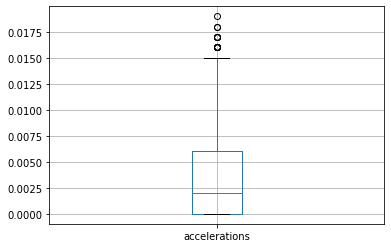

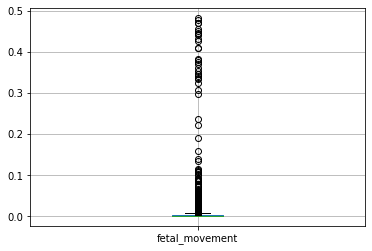

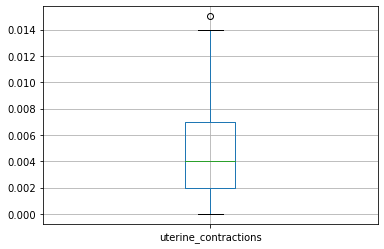

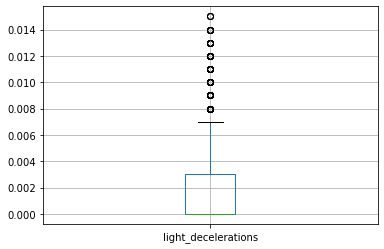

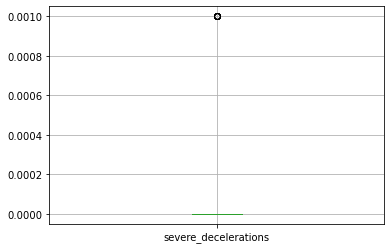

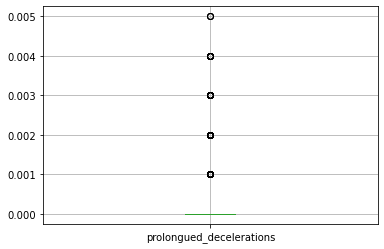

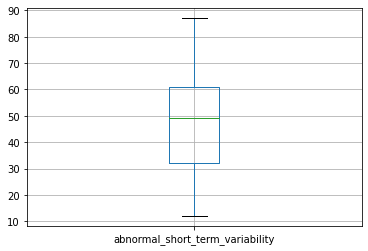

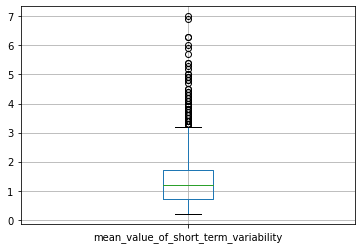

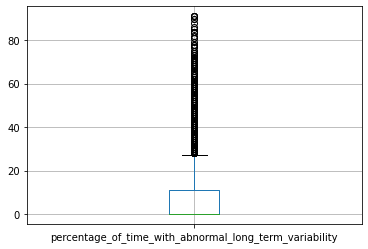

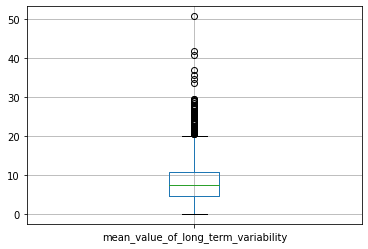

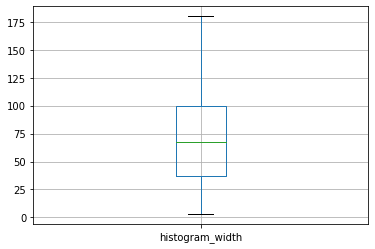

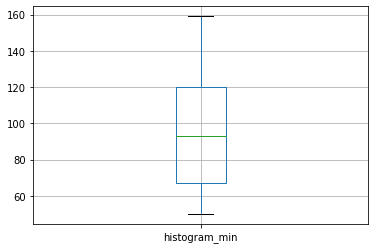

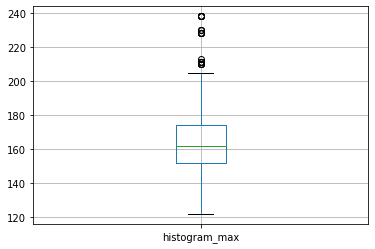

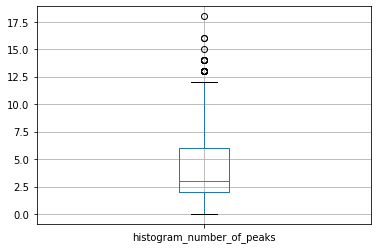

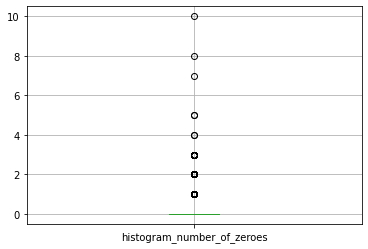

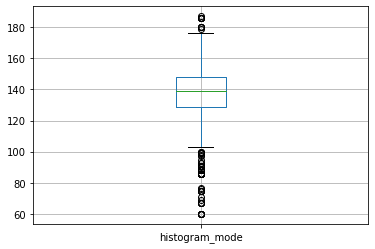

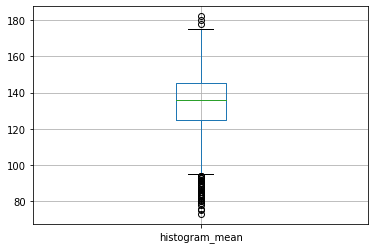

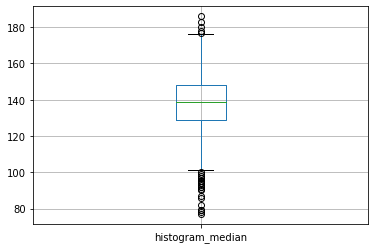

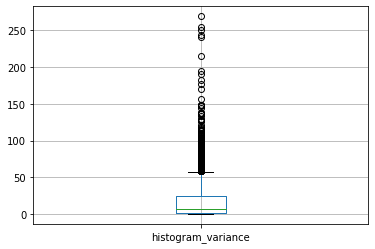

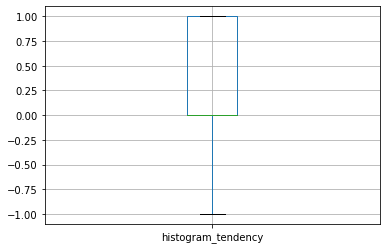

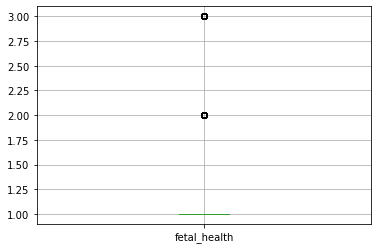

In [16]:
# Checking for Outliers via visualization:
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        plt.figure()
        df.boxplot([col])
        plt.show()

### Outliers are Present in the dataset

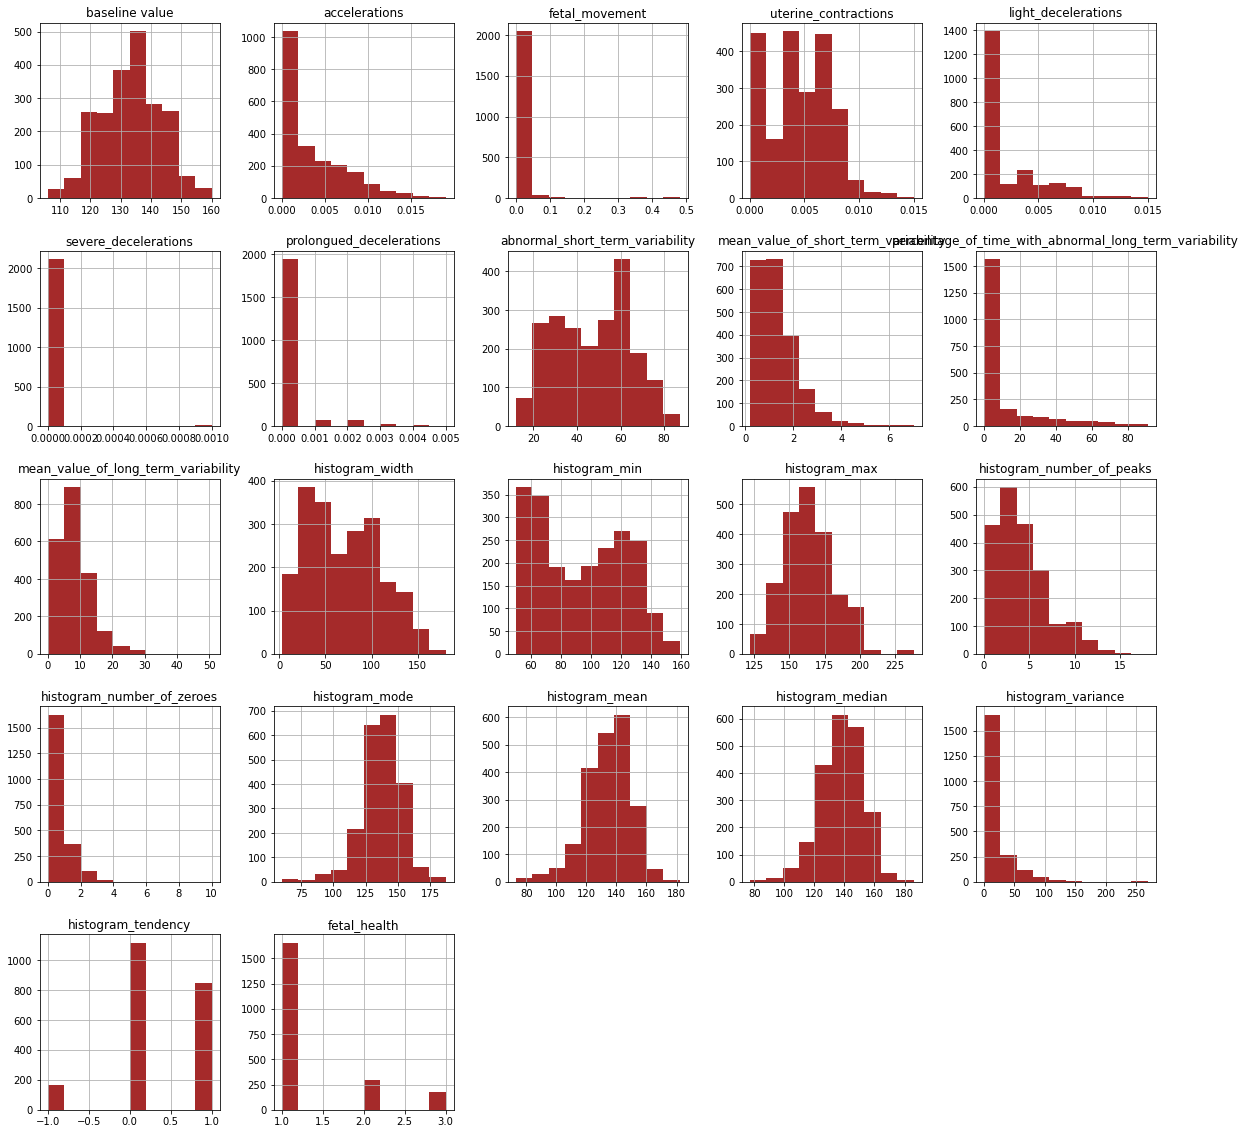

In [17]:
# Visualization of features to check the spread of data:
fig = df.hist(figsize = (20,20),color="brown")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'baseline value'),
  Text(0, 1.5, 'accelerations'),
  Text(0, 2.5, 'fetal_movement'),
  Text(0, 3.5, 'uterine_contractions'),
  Text(0, 4.5, 'light_decelerations'),
  Text(0, 5.5, 'severe_decelerations'),
  Text(0, 6.5, 'prolongued_decelerations'),
  Text(0, 7.5, 'abnormal_short_term_variability'),
  Text(0, 8.5, 'mean_value_of_short_term_variability'),
  Text(0, 9.5, 'percentage_of_time_with_abnormal_long_term_variability'),
  Text(0, 10.5, 'mean_value_of_long_term_variability'),
  Text(0, 11.5, 'histogram_width'),
  Text(0, 12.5, 'histogram_min'),
  Text(0, 13.5, 'histogram_max'),
  Text(0, 14.5, 'histogram_number_of_peaks'),
  Text(0, 15.5, 'histogram_number_of_zeroes'),
  Text(0, 16.5, 'histogram_mode'),
  Text(0, 17.5, 'histogram_mean'),
  Text(0, 18.5, 'histogram_median'),
  Text(0, 19.5, 'histogram_variance'),
  Text

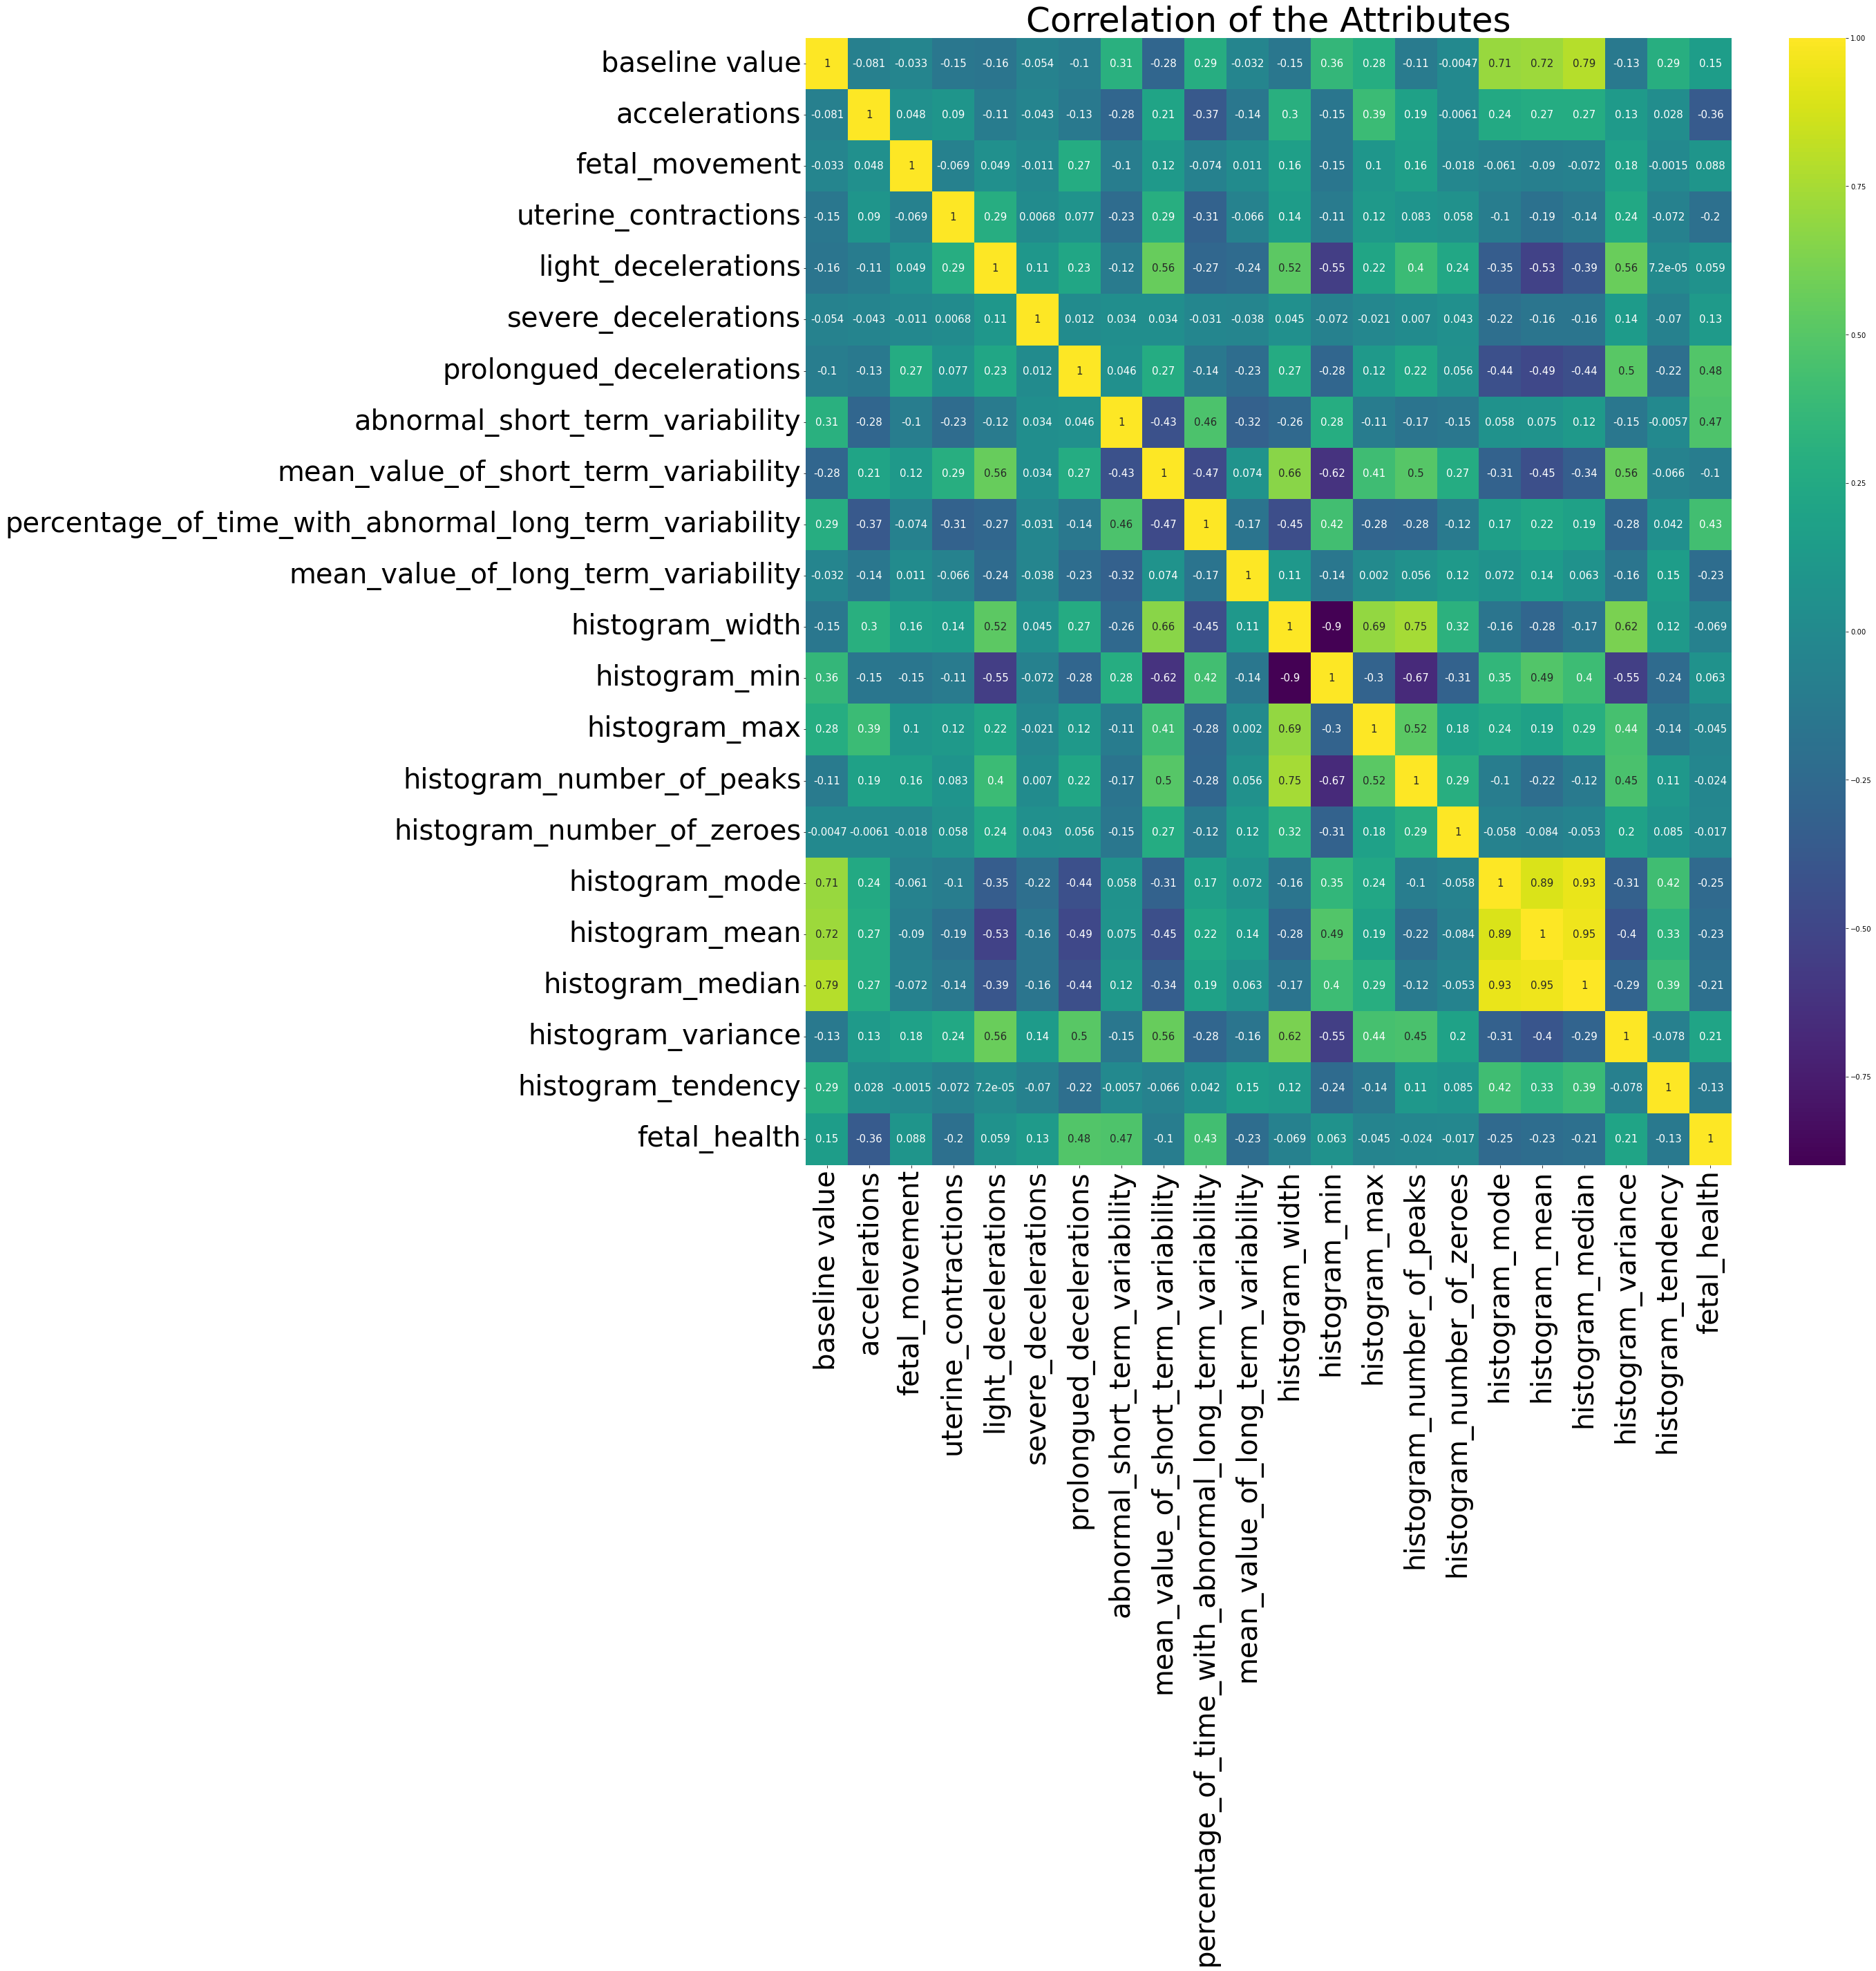

In [18]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 15},cmap="viridis")
plt.title('Correlation of the Attributes',fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

### The dataframe has a unique form of correlation.

C:\Users\roshs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


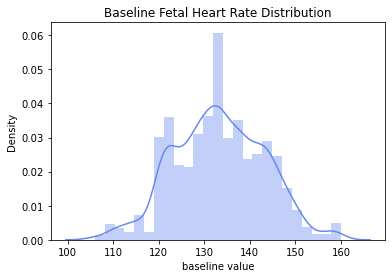

In [19]:
# Visualization of Baseline Fetal Heart Rate Distribution
sns.set_palette(palette="coolwarm")
sns.distplot(df['baseline value'])
plt.title('Baseline Fetal Heart Rate Distribution');

In [20]:
# Checking for Unique Values in the dataset
for col in df.columns:
    print(col,'=',df[col].nunique())

baseline value = 48
accelerations = 20
fetal_movement = 102
uterine_contractions = 16
light_decelerations = 16
severe_decelerations = 2
prolongued_decelerations = 6
abnormal_short_term_variability = 75
mean_value_of_short_term_variability = 57
percentage_of_time_with_abnormal_long_term_variability = 87
mean_value_of_long_term_variability = 249
histogram_width = 154
histogram_min = 109
histogram_max = 86
histogram_number_of_peaks = 18
histogram_number_of_zeroes = 9
histogram_mode = 88
histogram_mean = 103
histogram_median = 95
histogram_variance = 133
histogram_tendency = 3
fetal_health = 3


In [21]:
# Printing the columns of the dataframe
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [22]:
# Printing the unique values of fetal_health column
df['fetal_health'].unique()

array([2., 1., 3.])

In [23]:
# engineering new categorical target column for Normal and At Risk fetal health
df['fetal_health'].replace([1.000, 2.000, 3.000],[0, 1, 2],inplace=True)

C:\Users\roshs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Prolonged Decelerations and Fetal Health Outcomes')

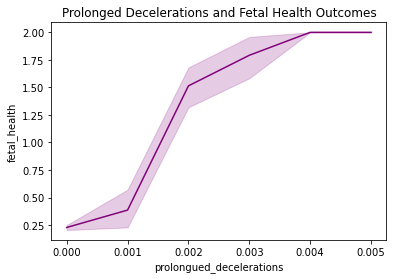

In [24]:
# Visualization of Prolonged Decelerations Vs Fetal Health Outcomes
sns.set_palette(palette="RdPu_r")
sns.lineplot('prolongued_decelerations','fetal_health', data=df, alpha=1.0)
plt.title('Prolonged Decelerations and Fetal Health Outcomes')

C:\Users\roshs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Prolonged Decelerations and Fetal Heart Rate')

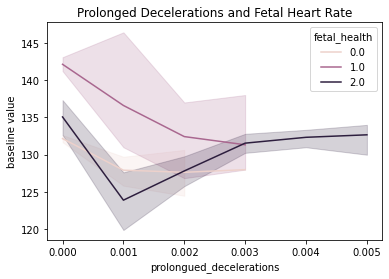

In [25]:
# Visualization of Prolonged Decelerations Vs Fetal Heart Rate
sns.set_palette(palette="RdPu")
sns.lineplot('prolongued_decelerations','baseline value',hue='fetal_health', data=df, alpha=1.0)
plt.title('Prolonged Decelerations and Fetal Heart Rate')

### 4. Data Spliting:

In [26]:
# Seperating Independent and Dependent Variables
x=df.drop(labels=['fetal_health'],axis=1)
y=df[['fetal_health']]

<AxesSubplot:xlabel='fetal_health'>

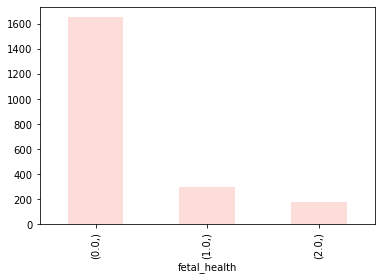

In [27]:
# Checking for balance distribution of the dataframe
y.value_counts().plot.bar()

In [28]:
# Creating a data balancing module
sm = SMOTE()

In [29]:
# Balancing the dataset
X, Y = sm.fit_resample(x,y)

<AxesSubplot:xlabel='fetal_health'>

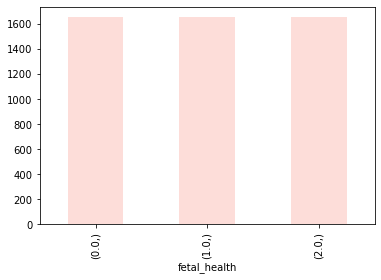

In [30]:
# Checking for balance distribution of the dataframe
Y.value_counts().plot.bar()

In [31]:
# Seperating Training and Testing Data for Model Building
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2)

## 5. Model Building

### 5.a. Decision Tree Regressor Models and Pruning:

In [32]:
# Decision Tree model build 
dTreep=DecisionTreeClassifier(max_depth=5)
# Model Fitting
dTreep.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [33]:
# Accuracy Testing
dtptr=dTreep.score(x_train,y_train)
print('Train Score:',dtptr)
dtpte=dTreep.score(x_test,y_test)
print('Test Score: ',dtpte)

Train Score: 0.898539778449144
Test Score:  0.892245720040282


### This model seems to be Decent one, we can try with other models.

### 5.b. Ramdom Forest Regressor Model:

In [34]:
# Random Forest Model Build
rf = RandomForestClassifier(n_estimators = 100)
# Model Fitting
rf.fit(x_train, y_train)

C:\Users\roshs\AppData\Local\Temp/ipykernel_10200/699122131.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

In [35]:
# Accuracy Testing
rftr=rf.score(x_train,y_train)
print('Train Score:',rftr)
rfte=rf.score(x_test,y_test)
print('Test Score: ',rfte)

Train Score: 0.9997482376636455
Test Score:  0.9697885196374623


### This model seems to be an close to Perfect one, we can try with other models.

### 5.c. Logistic Regressor Model:

In [36]:
# Random Forest Model Build
lr = LogisticRegression()
# Model Fitting
lr.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# Accuracy Testing
lrtr=lr.score(x_train,y_train)
print('Train Score:',lrtr)
lrte=lr.score(x_test,y_test)
print('Test Score: ',lrte)

Train Score: 0.8018630412890232
Test Score:  0.783484390735146


### This model seems to be a Underfitting one, we can try with other models.

### 5.d. XGBoost Classifier Model:

In [38]:
# XGBoost Classifier Model Build
xgb = XGBClassifier(n_estimators = 100)
# Model Fitting
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [39]:
# Accuracy Testing
xgbtr=xgb.score(x_train,y_train)
print('Train Score:',xgbtr)
xgbte=xgb.score(x_test,y_test)
print('Test Score: ',xgbte)

Train Score: 0.9997482376636455
Test Score:  0.9848942598187311


### This model seems to be a close to Perfect one , we can try with other models.

### 5.e. Gaussian Naive Bayes Model:

In [40]:
# Gaussian Naive Bayes Model
gnb = GaussianNB()
# Model Fitting
gnb.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [41]:
# Accuracy Testing
gnbtr=gnb.score(x_train,y_train)
print('Train Score:',gnbtr)
gnbte=gnb.score(x_test,y_test)
print('Test Score: ',gnbte)

Train Score: 0.7729103726082578
Test Score:  0.7865055387713998


### This model seems to be a Underfitting one,  we can proceed to Conclusion Segment.

### 6. Conclusion:

In [42]:
print('Decision Tree Model:')
print('Train Score:',dtptr)
print('Test Score: ',dtpte)
print('Random Forest Model:')
print('Train Score:',rftr)
print('Test Score: ',rfte)
print('Logistic Regressor Model:')
print('Train Score:',lrtr)
print('Test Score: ',lrte)
print('XGBoost Classifier Model:')
print('Train Score:',xgbtr)
print('Test Score: ',xgbte)
print('Gaussian Naive Bayes Model:')
print('Train Score:',gnbtr)
print('Test Score: ',gnbte)
# print('Support Vector Classifier Model:')
# print('Train Score:',svctr)
# print('Test Score: ',svcte)

Decision Tree Model:
Train Score: 0.898539778449144
Test Score:  0.892245720040282
Random Forest Model:
Train Score: 0.9997482376636455
Test Score:  0.9697885196374623
Logistic Regressor Model:
Train Score: 0.8018630412890232
Test Score:  0.783484390735146
XGBoost Classifier Model:
Train Score: 0.9997482376636455
Test Score:  0.9848942598187311
Gaussian Naive Bayes Model:
Train Score: 0.7729103726082578
Test Score:  0.7865055387713998


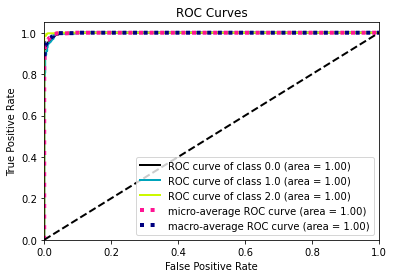

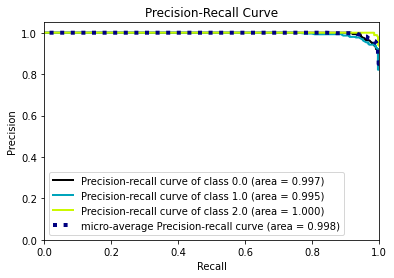

In [43]:
# Plotting the Metrics of Random Forest Model
y_score = rf.predict_proba(x_test)
y_pred = rf.predict(x_test)

plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [44]:
# Printing the Accuracy Random Forest Model
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9697885196374623


In [45]:
# Classify test data and display score and report of Random Forest Model
predicted = rf.predict(x_test)
score = 100.0 * metrics.accuracy_score(y_test, predicted)
print(f'Random Forest Model Score = {score:4.1f}%\n')
print(f'Classification Report:\n {metrics.classification_report(y_test, predicted)}\n')

Random Forest Model Score = 97.0%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       329
         1.0       0.95      0.96      0.96       318
         2.0       0.99      0.99      0.99       346

    accuracy                           0.97       993
   macro avg       0.97      0.97      0.97       993
weighted avg       0.97      0.97      0.97       993




In [46]:
y_pred_class = rf.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[316  12   1]
 [  9 306   3]
 [  2   3 341]]


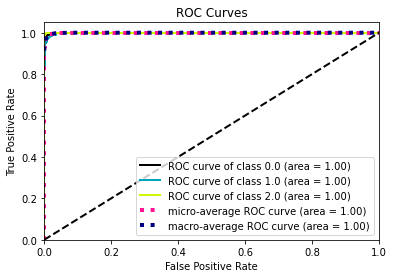

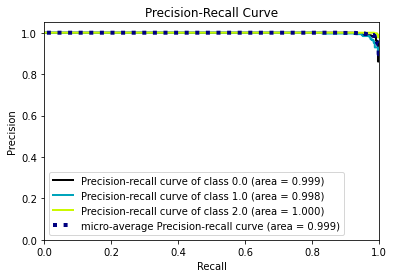

In [47]:
# Plotting the Metrics of XGBoost Classifier Model
y_score = xgb.predict_proba(x_test)
y_pred = xgb.predict(x_test)

plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [48]:
# Printing the Accuracy XGBoost Classifier Model
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9848942598187311


In [49]:
# Classify test data and display score and report of XGBoost Classifier Model
predicted = xgb.predict(x_test)
score = 100.0 * metrics.accuracy_score(y_test, predicted)
print(f'XGBoost Classifier Model Score = {score:4.1f}%\n')
print(f'Classification Report:\n {metrics.classification_report(y_test, predicted)}\n')

XGBoost Classifier Model Score = 98.5%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       329
         1.0       0.98      0.97      0.98       318
         2.0       0.99      0.99      0.99       346

    accuracy                           0.98       993
   macro avg       0.98      0.98      0.98       993
weighted avg       0.98      0.98      0.98       993




(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Suspicion'), Text(0, 2.5, 'At Risk')])

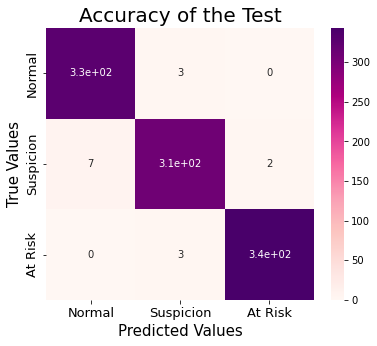

In [50]:
# Printing the Confusion Matrix of XGBoost Classifier Model
y_pred_class = xgb.predict(x_test)
plt.figure(figsize=(6,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_class),annot=True,xticklabels = ['Normal', 'Suspicion','At Risk'] , yticklabels = ['Normal', 'Suspicion','At Risk'],cmap='RdPu' ) 
plt.ylabel('True Values',fontsize=15)
plt.xlabel('Predicted Values',fontsize=15)
plt.title('Accuracy of the Test',fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

## Conclusion:
### All the models seems to have some imperfections; lets go with XGBoost Classifier Model since it showed the close to perfect score.

## 7. Saving the Selected Model:

In [51]:
# Saving the XGBoost Classifier Model
data={"Model": xgb}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [52]:
# Checking the saved model
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)

model=data["Model"]

In [53]:
# Storing one entry of the testing dataset
test=x_test.iloc[9:10,:]

In [54]:
# Checking the data
test

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
4919,134.0,0.004112,0.001112,0.001112,0.003,0.0,0.003,61.111555,1.766534,0.0,...,117.442226,66.557774,184.0,5.77689,0.0,88.111555,112.111555,110.888445,178.207138,-1.0


In [55]:
# Storing the data for testing purposes
test.to_csv('test_csv.csv',index=0)

## 8. Visualization of the Dataset

In [56]:
# Replacing the values of fetal health column for easier access
Y['fetal_health'].replace([0, 1, 2],['Normal', 'Suspicion', 'At Risk'],inplace=True)

In [57]:
# creating a balanced dataframe DF
DF=X

In [58]:
# Adding the fetal health column to the dataframe
DF['Fetal Health']=Y['fetal_health']

In [59]:
# Checking the dataframe
DF

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,Fetal Health
0,120.000000,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,73.000000,0.500000,43.000000,...,62.000000,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000,Suspicion
1,132.000000,0.00600,0.00000,0.006000,0.003000,0.0,0.000000,17.000000,2.100000,0.000000,...,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000,Normal
2,133.000000,0.00300,0.00000,0.008000,0.003000,0.0,0.000000,16.000000,2.100000,0.000000,...,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000,Normal
3,134.000000,0.00300,0.00000,0.008000,0.003000,0.0,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000,Normal
4,132.000000,0.00700,0.00000,0.008000,0.000000,0.0,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,133.000000,0.00000,0.00000,0.000000,0.000000,0.0,0.000000,73.000000,0.204535,87.546481,...,131.000000,139.000000,1.000000,0.000000,133.045352,134.000000,135.000000,0.000000,0.000000,At Risk
4961,133.040593,0.00124,0.00048,0.011801,0.008000,0.0,0.002760,37.394815,5.388563,0.000000,...,50.000000,202.638370,6.239852,2.280444,68.361630,101.243556,107.918815,221.236148,-0.239852,At Risk
4962,145.440374,0.00000,0.00152,0.001760,0.000000,0.0,0.000000,83.279813,0.324006,29.918940,...,131.519875,170.960249,2.000000,0.000000,145.920499,144.680436,146.440374,0.240062,-0.759938,At Risk
4963,127.132486,0.00000,0.00000,0.002349,0.000000,0.0,0.000000,86.000000,0.300000,77.481850,...,114.867514,130.000000,0.216879,0.000000,127.132486,125.566243,128.132486,0.000000,0.783121,At Risk


Text(11.538194444444443, 0.5, 'Count')

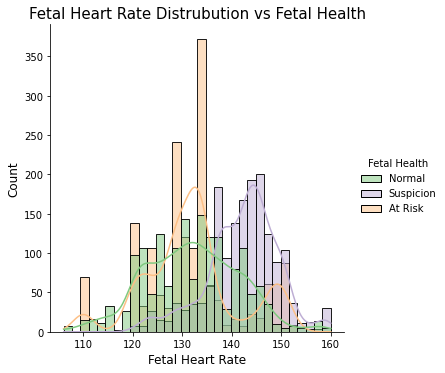

In [60]:
# Checking the relationship between Fetal Heart Rate Distrubution & Fetal Health
sns.set_palette(palette='Accent')
sns.displot(data=DF, x='baseline value', hue='Fetal Health',hue_order=('Normal','Suspicion','At Risk'), kde=True)
plt.title('Fetal Heart Rate Distrubution vs Fetal Health',fontsize=15)
plt.xlabel("Fetal Heart Rate",fontsize=12)
plt.ylabel('Count',fontsize=12)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0, 0.5, 'baseline value'),
  Text(0, 1.5, 'accelerations'),
  Text(0, 2.5, 'fetal_movement'),
  Text(0, 3.5, 'uterine_contractions'),
  Text(0, 4.5, 'light_decelerations'),
  Text(0, 5.5, 'severe_decelerations'),
  Text(0, 6.5, 'prolongued_decelerations'),
  Text(0, 7.5, 'abnormal_short_term_variability'),
  Text(0, 8.5, 'mean_value_of_short_term_variability'),
  Text(0, 9.5, 'percentage_of_time_with_abnormal_long_term_variability'),
  Text(0, 10.5, 'mean_value_of_long_term_variability'),
  Text(0, 11.5, 'histogram_width'),
  Text(0, 12.5, 'histogram_min'),
  Text(0, 13.5, 'histogram_max'),
  Text(0, 14.5, 'histogram_number_of_peaks'),
  Text(0, 15.5, 'histogram_number_of_zeroes'),
  Text(0, 16.5, 'histogram_mode'),
  Text(0, 17.5, 'histogram_mean'),
  Text(0, 18.5, 'histogram_median'),
  Text(0, 19.5, 'histogram_variance'),
  Text(0, 20

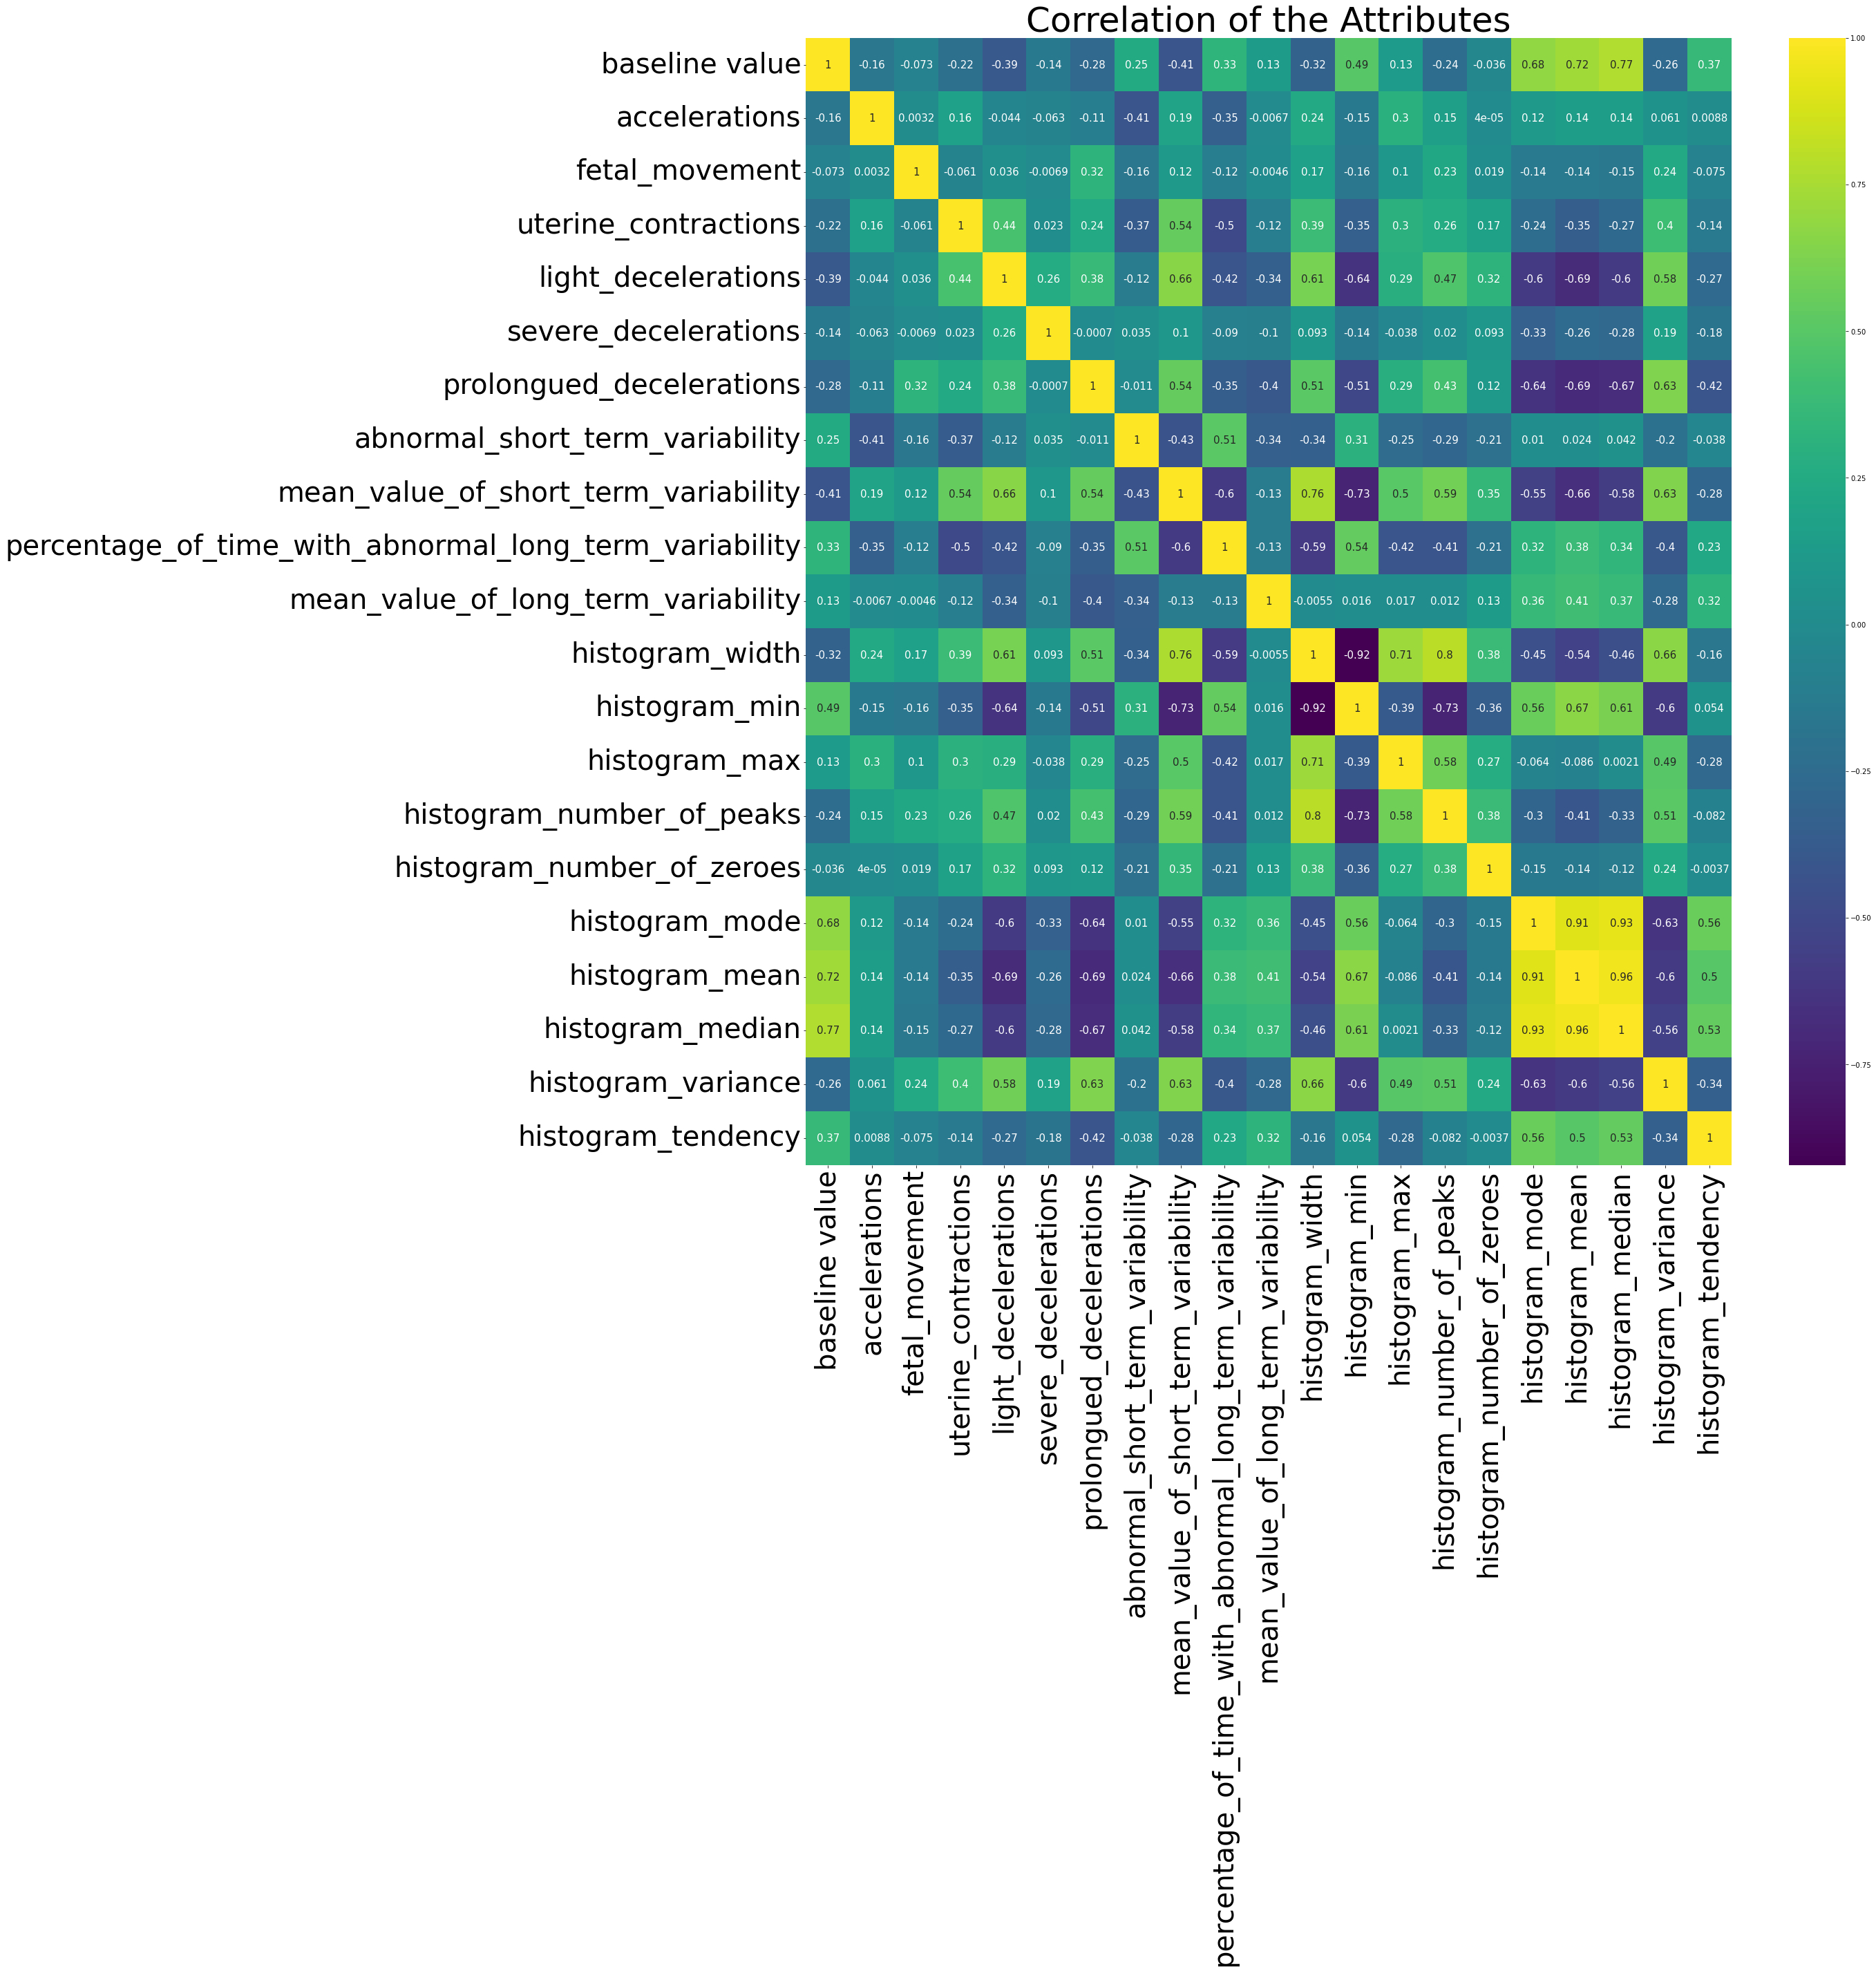

In [61]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(DF.corr(), annot=True, annot_kws={'size': 15},cmap="viridis")
plt.title('Correlation of the Attributes',fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

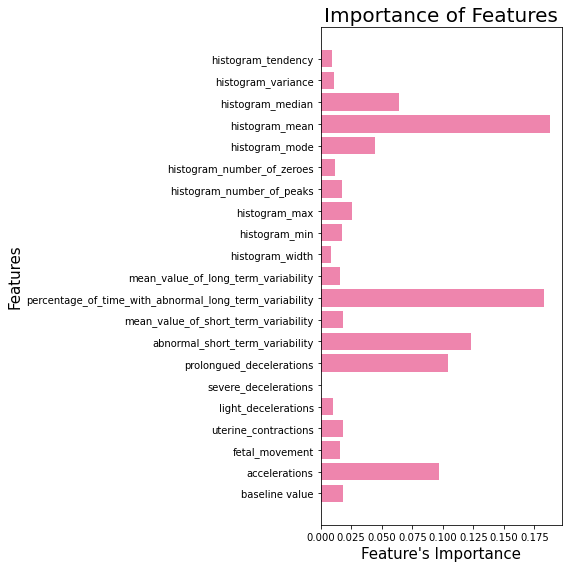

In [62]:
# Plotting Feature's Importance
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.figure(figsize=(8,8))
    sns.set_palette(palette="RdPu_d")
    plt.title('Importance of Features',fontsize=20)
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x_train.columns.values) 
    plt.xlabel("Feature's Importance",fontsize=15)
    plt.ylabel('Features',fontsize=15)

plot_feature_importances(xgb)
plt.tight_layout()
plt.savefig('Feature.png')

C:\Users\roshs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


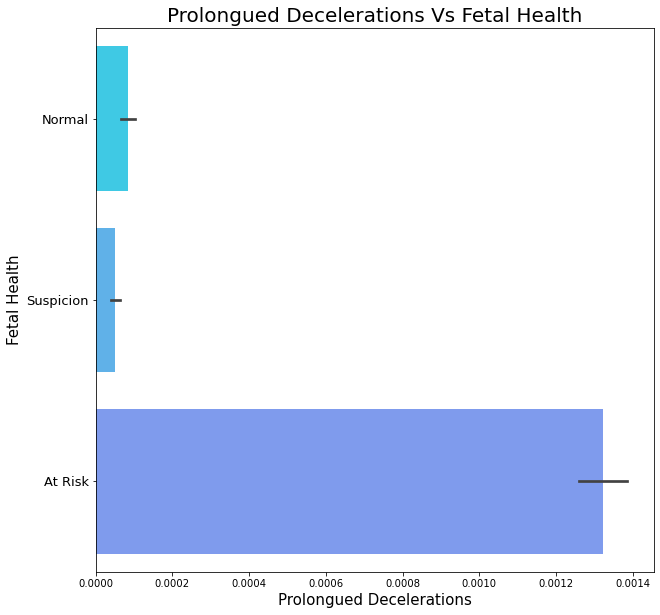

In [63]:
# Checking the relatinship between Prolongued Decelerations & Fetal Health
sns.set_palette(palette='cool')
sns.barplot('prolongued_decelerations','Fetal Health', data=DF)
y = [0,1,2]
labels = ['Normal', 'Suspicion','At Risk']
plt.yticks(y, labels,fontsize=13)
plt.title('Prolongued Decelerations Vs Fetal Health',fontsize=20)
plt.gcf().set_size_inches(10,10)
plt.ylabel('Fetal Health',fontsize=15)
plt.xlabel('Prolongued Decelerations',fontsize=15)
plt.show()

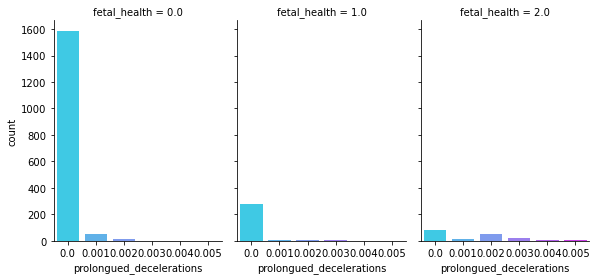

In [64]:
# Checking the relatinship between Prolongued Decelerations & each Class of Fetal Health
sns.catplot(x="prolongued_decelerations", col="fetal_health",
                data=df, kind="count",
                height=4, aspect=0.7)

Text(0.5, 1.0, 'Mean Value of Short-Term and Long-Term Variability in FHR')

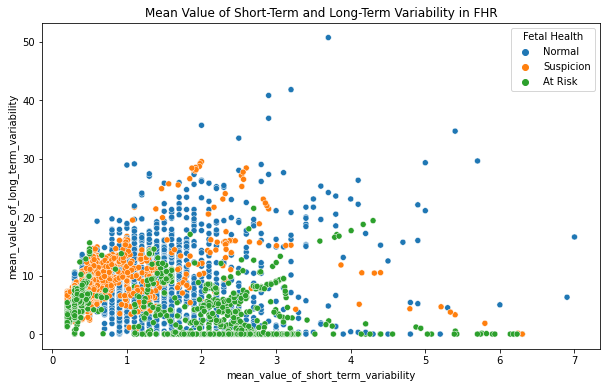

In [65]:
# Creating a scatter plot for sample from each class
sns.set_palette(palette="tab10")
plt.figure(figsize=(10,6))
sns.scatterplot(x="mean_value_of_short_term_variability", y="mean_value_of_long_term_variability", hue='Fetal Health', hue_order=('Normal','Suspicion','At Risk'), data=DF)
plt.title('Mean Value of Short-Term and Long-Term Variability in FHR')

# V. Conclusion:
# Capstone Project Completed Successfully with Close to Perfect Score with XGBoost Classifier Model Predicting the Health condition of the Fetus.